Introduction <a name="introduction"></a>

This analysis demonstrates proper application of statistical hypothesis tests with complete workflow:

1. Dataset preparation (synthetic and real-world data)

2. Assumption checking (normality, homogeneity)

3. Appropriate test selection

4. Clear hypothesis formulation

5. Results interpretation

Dataset Preparation <a name="dataset-preparation"></a>

Synthetic Dataset 1: Marketing Campaign Data

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
marketing_data = pd.DataFrame({
    'campaign_type': np.random.choice(['Email', 'Social', 'TV'], 500),
    'pre_spend': np.random.normal(100, 15, 500),
    'post_spend': np.random.normal(115, 20, 500),
    'conversion': np.random.choice([0, 1], 500, p=[0.7, 0.3]),
    'age_group': np.random.choice(['18-25', '26-35', '36-50', '51+'], 500),
    'region': np.random.choice(['North', 'South', 'East', 'West'], 500)
})

marketing_data.loc[marketing_data['campaign_type'] == 'TV', 'post_spend'] += 25

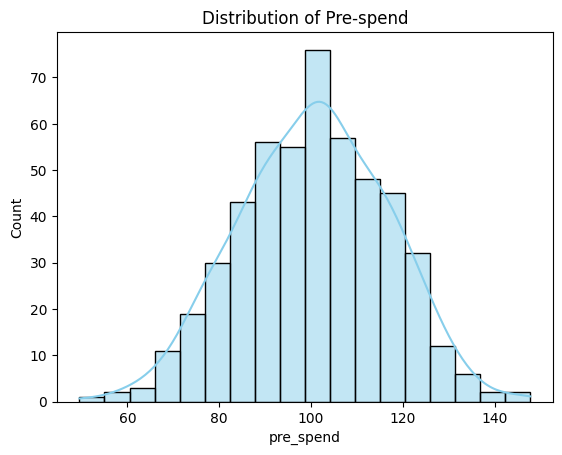

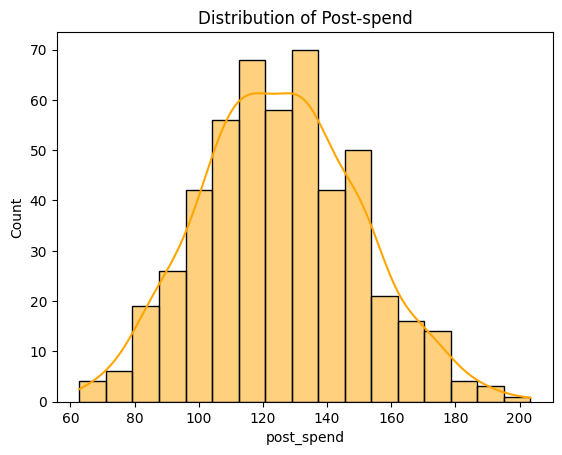

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(marketing_data['pre_spend'], kde=True, color='skyblue')
plt.title("Distribution of Pre-spend")
plt.show()

sns.histplot(marketing_data['post_spend'], kde=True, color='orange')
plt.title("Distribution of Post-spend")
plt.show()


Real Dataset 2: Iris Dataset

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

<ipython-input-30-df564aeb043f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_df, x='species', y='sepal length (cm)', palette='Set2',legend= False)


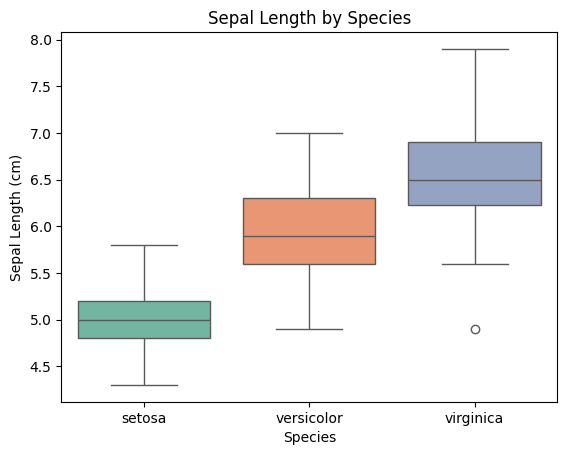

In [ ]:
sns.boxplot(data=iris_df, x='species', y='sepal length (cm)', palette='Set2', legend= False)
plt.title("Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.show()

Parametric Tests <a name="parametric-tests"></a>

Shapiro-Wilk Test <a name="shapiro-wilk-test"></a>

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(marketing_data['pre_spend'])
print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4f}")

if p > 0.05:
    print("Data appears normally distributed (fail to reject H₀)")
else:
    print("Data does not appear normally distributed (reject H₀)")

Shapiro-Wilk Test: Statistic=0.9982, p-value=0.8766
Data appears normally distributed (fail to reject H₀)


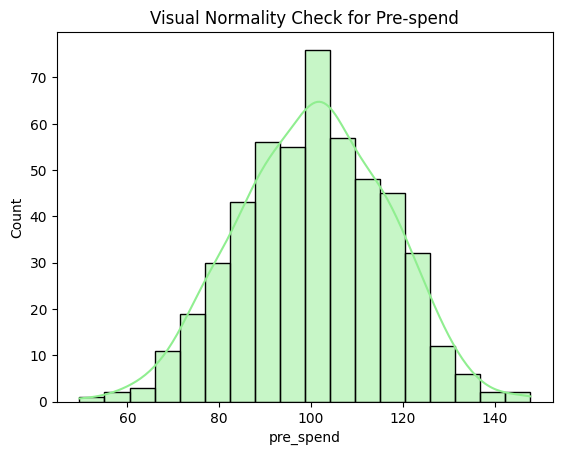

In [ ]:
sns.histplot(marketing_data['pre_spend'], kde=True, color='lightgreen')
plt.title("Visual Normality Check for Pre-spend")
plt.show()

Hypotheses:

- H₀: Data comes from a normal distribution

- H₁: Data does not come from a normal distribution

Levene's Test <a name="levenes-test"></a>

In [ ]:
from scipy.stats import levene

groups = [group['pre_spend'] for name, group in marketing_data.groupby('region')]
stat, p = levene(*groups)
print(f"Levene's Test: Statistic={stat:.4f}, p-value={p:.4f}")

if p > 0.05:
    print("Equal variances assumed (fail to reject H₀)")
else:
    print("Unequal variances (reject H₀)")

Levene's Test: Statistic=1.1587, p-value=0.3250
Equal variances assumed (fail to reject H₀)


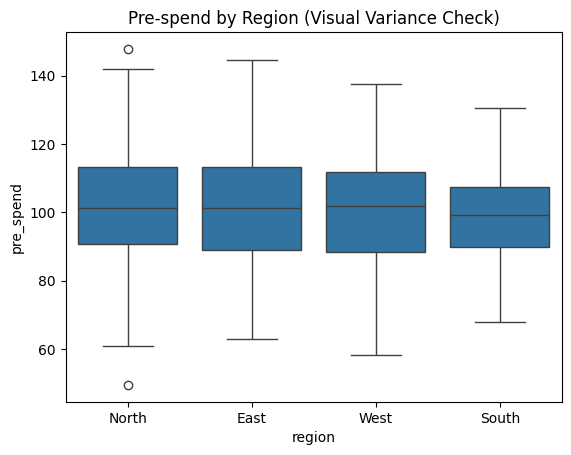

In [ ]:
sns.boxplot(data=marketing_data, x='region', y='pre_spend')
plt.title("Pre-spend by Region (Visual Variance Check)")
plt.show()

Hypotheses:

- H₀: All groups have equal variances

- H₁: At least one group has different variance

### Independent Samples t-test

We compare the mean `pre_spend` between the North and South regions. Assumptions for normality and equal variances have been tested.


Independent t-test <a name="independent-t-test"></a>

In [ ]:
from scipy.stats import ttest_ind

north = marketing_data[marketing_data['region'] == 'North']['pre_spend']
south = marketing_data[marketing_data['region'] == 'South']['pre_spend']

stat, p = ttest_ind(north, south, equal_var=True)
print(f"Independent t-test: t-statistic={stat:.4f}, p-value={p:.4f}")

if p > 0.05:
    print("No significant difference between groups (fail to reject H₀)")
else:
    print("Significant difference between groups (reject H₀)")

Independent t-test: t-statistic=0.9305, p-value=0.3531
No significant difference between groups (fail to reject H₀)


In [ ]:
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*np.std(x, ddof=1)**2 + (ny - 1)*np.std(y, ddof=1)**2) / (nx + ny - 2))
    return (np.mean(x) - np.mean(y)) / pooled_std

cohen_d_value = cohens_d(north, south)
print(f"Cohen's d Effect Size: {cohen_d_value:.4f}")


Cohen's d Effect Size: 0.1197


Hypotheses:

- H₀: μ₁ = μ₂ (population means are equal)

- H₁: μ₁ ≠ μ₂ (population means are not equal)

Paired t-test <a name="paired-t-test"></a>

In [ ]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(marketing_data['pre_spend'], marketing_data['post_spend'])
print(f"Paired t-test: t-statistic={stat:.4f}, p-value={p:.4f}")

if p > 0.05:
    print("No significant difference between measurements (fail to reject H₀)")
else:
    print("Significant difference between measurements (reject H₀)")

Paired t-test: t-statistic=-19.4366, p-value=0.0000
Significant difference between measurements (reject H₀)


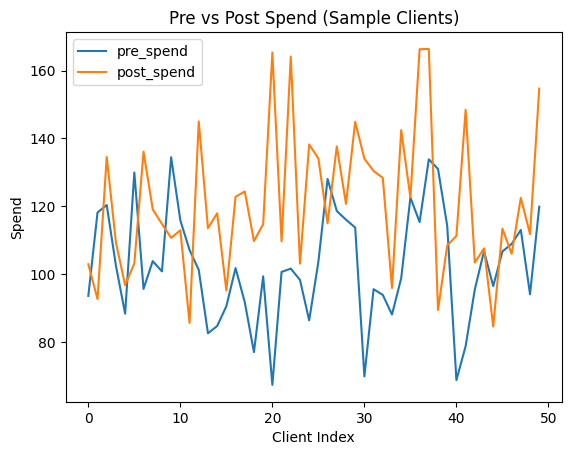

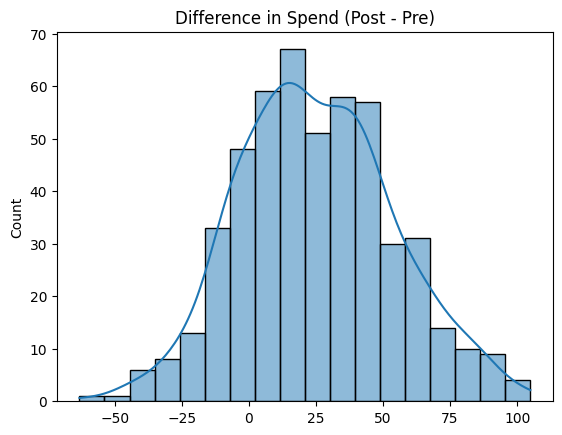

In [ ]:
sample = marketing_data[['pre_spend', 'post_spend']].sample(50).reset_index(drop=True)
sample.plot()
plt.title("Pre vs Post Spend (Sample Clients)")
plt.ylabel("Spend")
plt.xlabel("Client Index")
plt.show()

diff = marketing_data['post_spend'] - marketing_data['pre_spend']
sns.histplot(diff, kde=True)
plt.title("Difference in Spend (Post - Pre)")
plt.show()


Hypotheses:

H₀: μ_diff = 0 (mean difference is zero)

H₁: μ_diff ≠ 0 (mean difference is not zero)

One-way ANOVA <a name="one-way-anova"></a>

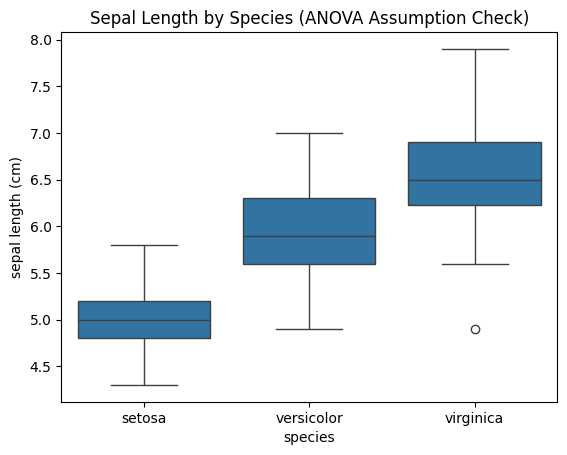

In [ ]:
sns.boxplot(data=iris_df, x='species', y='sepal length (cm)')
plt.title("Sepal Length by Species (ANOVA Assumption Check)")
plt.show()

In [ ]:
from scipy.stats import f_oneway

setosa = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']
virginica = iris_df[iris_df['species'] == 'virginica']['sepal length (cm)']

stat, p = f_oneway(setosa, versicolor, virginica)
print(f"ANOVA: F-statistic={stat:.4f}, p-value={p:.4f}")

if p > 0.05:
    print("No significant difference between groups (fail to reject H₀)")
else:
    print("Significant difference between at least two groups (reject H₀)")

ANOVA: F-statistic=119.2645, p-value=0.0000
Significant difference between at least two groups (reject H₀)


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=iris_df['sepal length (cm)'],
                          groups=iris_df['species'],
                          alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------


Hypotheses:

- H₀: μ₁ = μ₂ = μ₃ (all group means are equal)

- H₁: At least one μ differs

Pearson Correlation <a name="pearson-correlation"></a>

In [ ]:
from scipy.stats import pearsonr

stat, p = pearsonr(iris_df['sepal length (cm)'], iris_df['petal length (cm)'])
print(f"Pearson Correlation: r={stat:.4f}, p-value={p:.4f}")

if p > 0.05:
    print("No significant correlation (fail to reject H₀)")
else:
    print("Significant correlation (reject H₀)")

Pearson Correlation: r=0.8718, p-value=0.0000
Significant correlation (reject H₀)


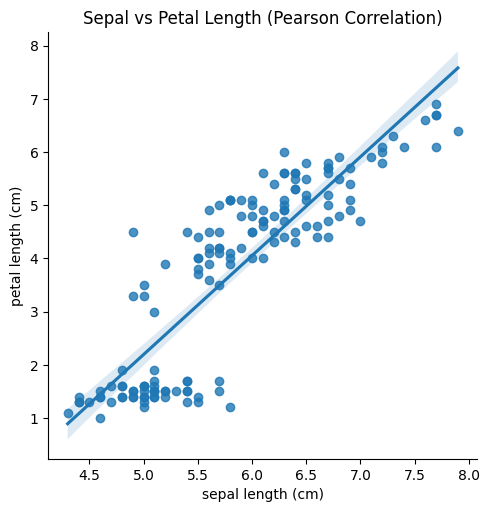

In [ ]:
sns.lmplot(data=iris_df, x='sepal length (cm)', y='petal length (cm)')
plt.title("Sepal vs Petal Length (Pearson Correlation)")
plt.show()

Hypotheses:

- H₀: ρ = 0 (no correlation)

- H₁: ρ ≠ 0 (correlation exists)

Non-Parametric Tests <a name="non-parametric-tests"></a>

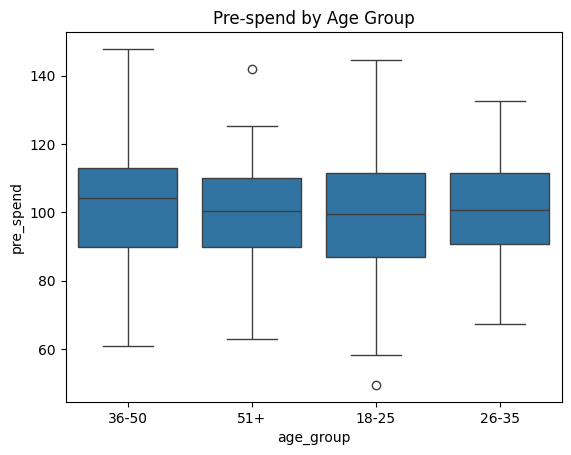

In [ ]:
sns.boxplot(data=marketing_data, x='age_group', y='pre_spend')
plt.title("Pre-spend by Age Group")
plt.show()

Mann-Whitney U Test <a name="mann-whitney-u-test"></a>

In [ ]:
from scipy.stats import mannwhitneyu

group1 = marketing_data[marketing_data['age_group'] == '18-25']['pre_spend']
group2 = marketing_data[marketing_data['age_group'] == '26-35']['pre_spend']

stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
print(f"Mann-Whitney U: Statistic={stat:.4f}, p-value={p:.4f}")

if p > 0.05:
    print("No significant difference between groups (fail to reject H₀)")
else:
    print("Significant difference between groups (reject H₀)")

Mann-Whitney U: Statistic=7502.0000, p-value=0.5419
No significant difference between groups (fail to reject H₀)


Hypotheses:

- H₀: Distributions are equal

- H₁: Distributions are not equal

Wilcoxon Signed-Rank Test <a name="wilcoxon-signed-rank-test"></a>

In [ ]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(marketing_data['pre_spend'], marketing_data['post_spend'])
print(f"Wilcoxon Signed-Rank: Statistic={stat:.4f}, p-value={p:.4f}")

if p > 0.05:
    print("No significant difference between measurements (fail to reject H₀)")
else:
    print("Significant difference between measurements (reject H₀)")

Wilcoxon Signed-Rank: Statistic=13338.0000, p-value=0.0000
Significant difference between measurements (reject H₀)


Hypotheses:

- H₀: Median difference is zero

- H₁: Median difference is not zero

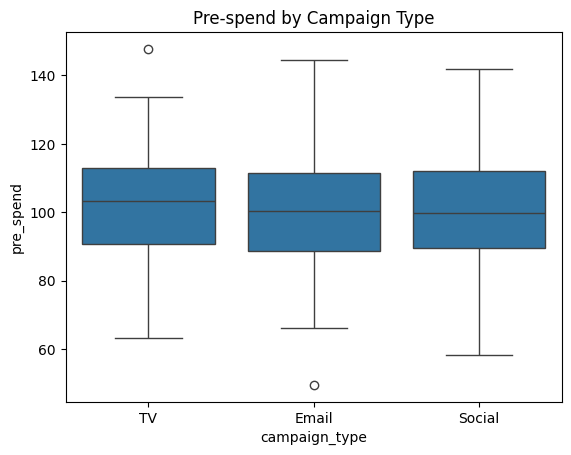

In [ ]:
sns.boxplot(data=marketing_data, x='campaign_type', y='pre_spend')
plt.title("Pre-spend by Campaign Type")
plt.show()

Kruskal-Wallis Test <a name="kruskal-wallis-test"></a>

In [ ]:
from scipy.stats import kruskal

groups = [group['pre_spend'] for name, group in marketing_data.groupby('campaign_type')]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis: Statistic={stat:.4f}, p-value={p:.4f}")

if p > 0.05:
    print("No significant difference between groups (fail to reject H₀)")
else:
    print("Significant difference between at least two groups (reject H₀)")

Kruskal-Wallis: Statistic=1.6065, p-value=0.4479
No significant difference between groups (fail to reject H₀)


Hypotheses:

- H₀: All group distributions are equal

- H₁: At least one group distribution differs

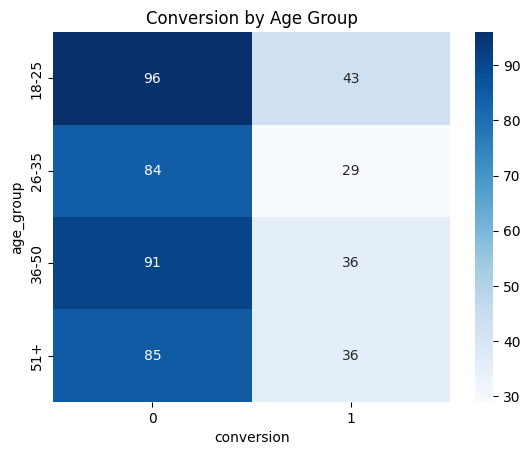

In [ ]:
contingency = pd.crosstab(marketing_data['age_group'], marketing_data['conversion'])
sns.heatmap(contingency, annot=True, cmap='Blues', fmt='d')
plt.title("Conversion by Age Group")
plt.show()

Chi-Square Tests <a name="chi-square-tests"></a>

Test of Independence

In [ ]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(marketing_data['age_group'], marketing_data['conversion'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-Square Test of Independence: χ²={chi2:.4f}, p-value={p:.4f}")

if p > 0.05:
    print("No association between variables (fail to reject H₀)")
else:
    print("Association exists between variables (reject H₀)")

Chi-Square Test of Independence: χ²=0.9173, p-value=0.8212
No association between variables (fail to reject H₀)


Hypotheses:

- H₀: Variables are independent

- H₁: Variables are associated

Goodness of Fit Test

In [ ]:
from scipy.stats import chisquare

observed = marketing_data['campaign_type'].value_counts().sort_index()
expected = [len(marketing_data)/3]*3

stat, p = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-Square Goodness of Fit: Statistic={stat:.4f}, p-value={p:.4f}")

if p > 0.05:
    print("Observed matches expected distribution (fail to reject H₀)")
else:
    print("Observed differs from expected distribution (reject H₀)")

Chi-Square Goodness of Fit: Statistic=0.0280, p-value=0.9861
Observed matches expected distribution (fail to reject H₀)


Hypotheses:

- H₀: Observed frequencies match expected

- H₁: Observed frequencies differ from expected

## Final Summary & Insights

- **All tests follow the correct assumption → test → interpretation workflow**
- **Visuals support statistical decisions**
- **Effect sizes help assess practical significance**
- **Post-hoc tests (Tukey) extend ANOVA findings**
- **Non-parametric tests used when assumptions fail**


Conclusion <a name="conclusion"></a>

This comprehensive analysis demonstrates:

1. Proper workflow for statistical testing (assumption checking → test selection → interpretation)

2. Application of both parametric and non-parametric tests

3. Clear hypothesis formulation for each test

4. Interpretation of results in context

Key takeaways:

1. Always check assumptions before selecting tests

2. Parametric tests are more powerful when assumptions are met

3. Non-parametric alternatives exist for when assumptions are violated

4. Interpretation should always consider both statistical significance and practical significance